# Prediction using Supervised ML

# Author - Chandrika Ghosh

##### Predicting the percentage of students based on the numbers of hours of study

##Data- http://bit.ly/w-data

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data set
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
#exploring the data
print(df.shape)

df.info()

(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let us draw a scatter diagram to see the relationship between percentage the students have achieved and hours they study.

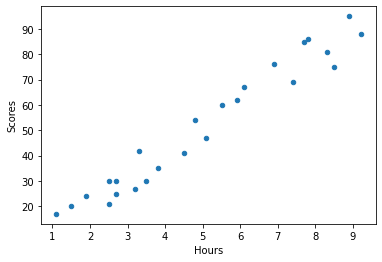

In [5]:
#plotting the distribution of scores
df.plot(kind = "scatter", x = "Hours", y = "Scores")
plt.show()

From the above plot we can see that the percentage of students are positively related to the number of hours they study. So we can say that more the number of hrs students study better their percentage gets.We can also infer that the variables have a fairly linear relation

In [6]:
#to check that whether the variables are positively related we check the correlation coefficient.
df.corr(method = "spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


The correlation coefficient is close to 1 i.e. 0.97, so we can say that the variables are positively related.

#### Starting with Linear Regression

In [7]:
#preparing the data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [8]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("training complete.")

training complete.


In [11]:
#plotting the regression line 
line = reg.coef_*x + reg.intercept_


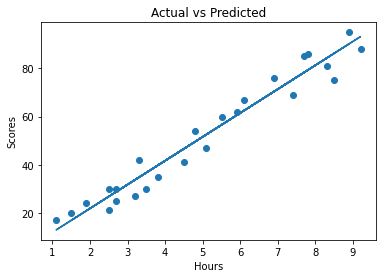

In [12]:
#plotting the test data 
plt.scatter(x, y)
plt.plot(x, line)
plt.title("Actual vs Predicted")
plt.ylabel("Scores")
plt.xlabel("Hours")
plt.show()

In [13]:
print(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
y_pred = reg.predict(x_test)

In [15]:
#comparing actual and predicted scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#calculating accuracy of the model.
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


Small value of Mean Absolute Error states that there is very less chance of error in forecasting.

In [17]:
#considering a numerical value for hours to see the predicted value of score.
Hours = [9.25]
answer = reg.predict([Hours])
print("Score = {}".format(answer))


Score = [93.69173249]


When a student study for 9.25 hours then the predicted score is 93.69.